In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os
import seaborn as sns
import pandas as pd
import pickle

from statsmodels.tsa.seasonal import seasonal_decompose
from Caulimate.Utils.Tools import makedir

REPO_PATH = "/l/users/minghao.fu/dataset"
SST_DATA_PATH = os.path.join(REPO_PATH, "CESM2/CESM2_pacific_SST.pkl")
META_DATA_PATH = os.path.join(REPO_PATH, "CESM2/CESM2_pacific.pkl")
FONT_SIZE = 12
LENGTH = 3000 
REGION_IDX = 50

data_full = np.load(SST_DATA_PATH, allow_pickle=True)
data = data_full[:, REGION_IDX]
makedir("./Figures", remove_exist=True)

/tmp/ipykernel_3668105/4242559296.py:11: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  tSST = np.empty(coords.dims.get('space_index'))
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


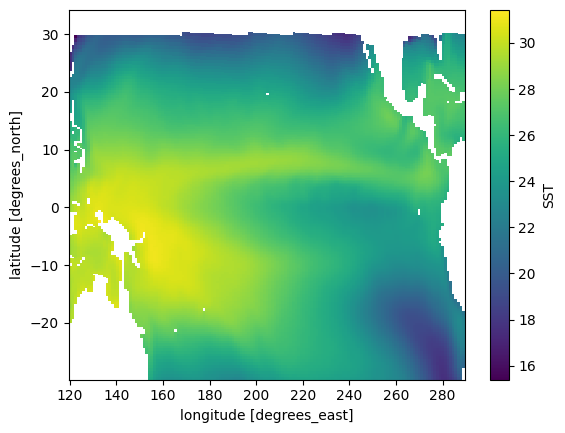

In [2]:

#replace "CESM2_pacific_SST" with the file you which to visualize.
f = open(SST_DATA_PATH, 'rb')
SST = pickle.load(f)
f.close()
#metadata file
f = open(META_DATA_PATH, 'rb')
coords = pickle.load(f).drop_dims('time')
f.close()

#visualize input data using metadata
tSST = np.empty(coords.dims.get('space_index'))
tSST[~coords.nnaSST]=np.nan
tSST[coords.nnaSST] = SST[0]
tst = coords.copy()
tst['SST']=('space_index', tSST)
tst.unstack('space_index').SST.plot(x='lon', y='lat')
plt.show()

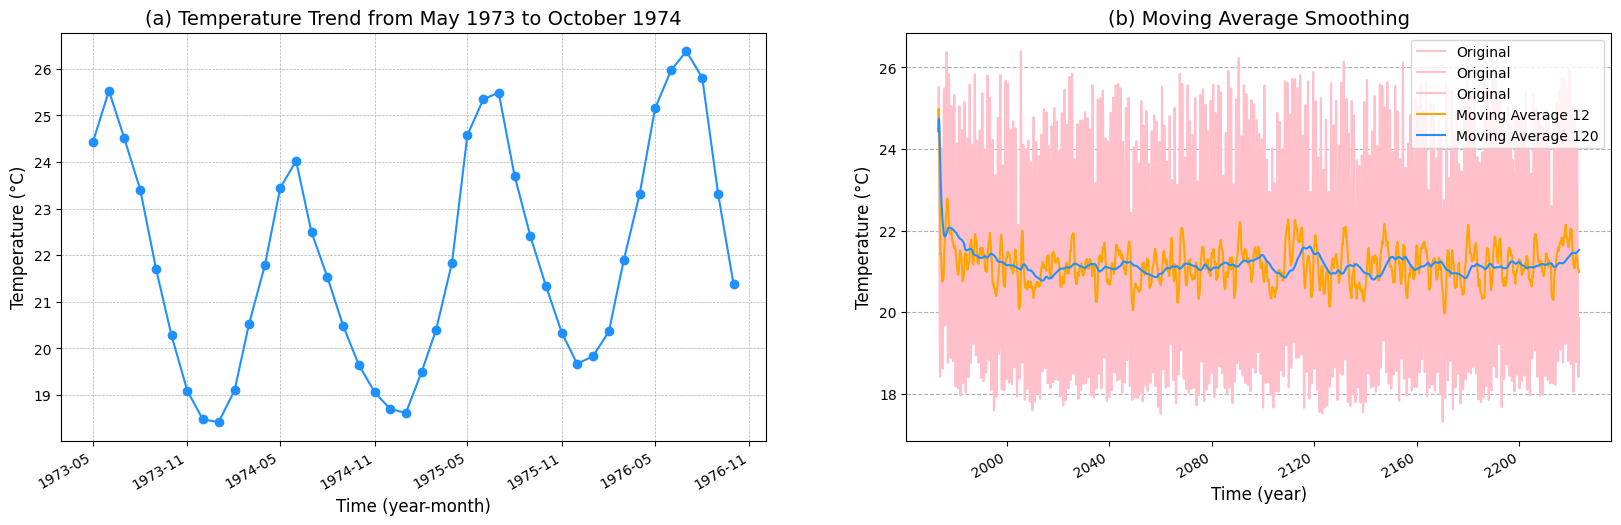

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Plot the temperature trend on the first subplot
months = np.arange('1973-05', '1976-11', dtype='datetime64[M]')
temperature = data[:len(months)]
axs[0].plot(months, temperature, marker='o', linestyle='-', color='dodgerblue')
axs[0].set_title('(a) Temperature Trend from May 1973 to October 1974', fontsize=14)
axs[0].set_xlabel('Time (year-month)', fontsize=FONT_SIZE)
axs[0].set_ylabel('Temperature (°C)', fontsize=FONT_SIZE)
axs[0].tick_params(axis='both', which='major', labelsize=10)
axs[0].grid(True, linestyle='--', linewidth=0.5)
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

date_range = pd.date_range(start='1973-05', periods=len(data[:LENGTH - 1]), freq='M')
data_frame = pd.DataFrame(data[:LENGTH - 1], index=date_range)
data_frame['MA_12'] = data_frame.rolling(window=12, min_periods=1).mean()
data_frame['MA_120'] = data_frame['MA_12'].rolling(window=120, min_periods=1).mean()

axs[1].plot(data_frame, label='Original', color='pink')
axs[1].plot(data_frame['MA_12'], label='Moving Average 12', color='orange')
axs[1].plot(data_frame['MA_120'], label='Moving Average 120', color='dodgerblue')
axs[1].grid(axis='y', linestyle='--')
axs[1].set_title('(b) Moving Average Smoothing',  fontsize=14)
axs[1].set_xlabel('Time (year)',  fontsize=FONT_SIZE)
axs[1].set_ylabel('Temperature (°C)',  fontsize=FONT_SIZE)
axs[1].legend()

fig.autofmt_xdate()

# Save the figure
plt.savefig('./Figures/combined_plot_horizontal.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

The dominant period is: 12.0
The periods are: [6.00000000e+03 1.50000000e+03 6.66666667e+02 ... 2.00803213e+00
 2.00601805e+00 2.00267023e+00]


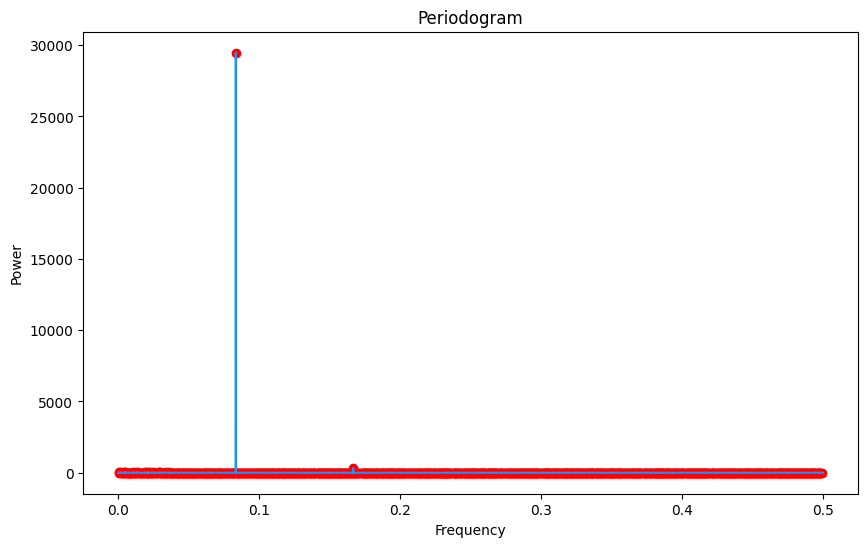

In [4]:
import pandas as pd
import numpy as np
from scipy.signal import periodogram, argrelextrema
import matplotlib.pyplot as plt

# Assuming 'data' is a list of values
data_frame = pd.DataFrame(data, columns=['Value'])

# Calculate the periodogram
frequencies, power = periodogram(data_frame['Value'])

# Find the local maxima in the power spectrum
local_maxima = argrelextrema(power, np.greater)

# Find the frequency with the highest power
dominant_frequency = frequencies[np.argmax(power)]

# The dominant period is the inverse of the dominant frequency
dominant_period = 1 / dominant_frequency

print(f"The dominant period is: {dominant_period}")

# The periods corresponding to the local maxima are the inverses of the frequencies
periods = 1 / frequencies[local_maxima]

print(f"The periods are: {periods}")

# Plot the periodogram
plt.figure(figsize=(10, 6))
plt.plot(frequencies, power, color='dodgerblue')
plt.scatter(frequencies[local_maxima], power[local_maxima], color='red')  # highlight the local maxima
plt.title('Periodogram')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [2]:
DOWNSCALE_PATH = os.path.join(REPO_PATH, "CESM2/downscaled_pacific_CESM2.txt")
DOWNSCALE_METADATA_PATH = os.path.join(REPO_PATH, "CESM2/downscaled_metadata.pkl")
data = np.loadtxt(DOWNSCALE_PATH)
f = open(DOWNSCALE_METADATA_PATH, 'rb')
meta_data = pickle.load(f)
f.close()

In [5]:
coords = np.column_stack((meta_data.lon.values, meta_data.lat.values))

In [6]:
data

array([[299.6206665 , 298.69442749, 299.05337524, ..., 296.90335083,
        297.3347168 , 298.12261963],
       [301.00805664, 299.97543335, 300.04632568, ..., 296.75891113,
        297.18374634, 297.80438232],
       [300.9119873 , 300.22463989, 300.47042847, ..., 296.87850952,
        297.27578735, 297.63201904],
       ...,
       [296.50219727, 295.04678345, 294.3019104 , ..., 301.28399658,
        301.31314087, 301.13244629],
       [297.74868774, 296.23443604, 295.33166504, ..., 299.66107178,
        299.72775269, 299.74835205],
       [299.1385498 , 297.90084839, 297.40029907, ..., 298.43353271,
        298.58013916, 298.44476318]])